<a href="https://colab.research.google.com/github/BautistaDavid/Team-1-Machine-Learning/blob/main/Proyecto1_Analisis__Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autores:

* David Felipe Bautista Bernal
* Angie Prieto Velazquez
* Santiago Villalobos Barrera  


# Analisis Exploratorio Encusta de Micronegocios 2019

Analisis Exploratorio de variables estraidas de los Modulos ```identificacion``` y ```ventas_Ingresos``` de la encuesta de Micronegocios 2019 presentada por el DANE.  

## Importación 

* Se importan la libreria ```pandas``` para poder trabajar con las bases de datos resepectivas.
> Notese que se importan las bases de datos usando el argmuneto ```dtype``` para transfromar los dataframes ```"DIRECTORIO" ```,``` "SECUENCIA_ENCUESTA" ```,```"SECUENCIA_P"``` a strings. Lo anterior con el fin de crear una ID para poder realizar un ```merge``` sobre las bases de datos.    

In [47]:
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np     
import seaborn as sns

In [48]:
identificacion=pd.read_csv("Modulo de identificacion.csv",sep=";",dtype={"DIRECTORIO":str,\
                                                                         "SECUENCIA_ENCUESTA":str,\
                                                                         "SECUENCIA_P":str})        
ventas_ingresos=pd.read_csv("Modulo de ventas o ingresos.csv",sep=";",dtype={"DIRECTORIO":str,\
                                                                         "SECUENCIA_ENCUESTA":str,\
                                                                         "SECUENCIA_P":str})

In [49]:
identificacion.insert(0,"ID",identificacion["DIRECTORIO"]+identificacion["SECUENCIA_ENCUESTA"]+\
                      identificacion["SECUENCIA_P"])
ventas_ingresos.insert(0,"ID",ventas_ingresos["DIRECTORIO"]+ventas_ingresos["SECUENCIA_ENCUESTA"]+\
                      ventas_ingresos["SECUENCIA_P"])

In [50]:
identificacion.head()

,ID,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,COD_DEPTO,AREA,CLASE,P35,P241,MES_REF,P3031,P3032_1,P3032_2,P3032_3,P3033,P3034,P3035,P3000,F_EXP,GRUPOS12,GRUPOS4
0,478012011,4780120,1,1,76,,1,1,22,ENERO,1,1,0,0,1,14,2,1,"295,24240408",12,4
1,478012411,4780124,1,1,76,,1,1,28,ENERO,1,2,0,0,1,108,2,2,"363,25222238",4,4
2,478012511,4780125,1,1,76,,1,1,38,ENERO,2,,,,2,240,2,2,"423,131668",12,4
3,478013811,4780138,1,1,76,,1,1,53,ENERO,2,,,,2,240,2,2,"337,29445917",4,4
4,478014511,4780145,1,1,23,,2,1,42,ENERO,2,,,,2,12,2,2,"201,81828011",4,4


In [51]:
ventas_ingresos.head()

,ID,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,P3057,P3058,P3059,P3060,P3061,P3062,P4002,P3063,P3064,P3065,P3066,P3067,P3092,P3093,P4005,P4006,P4007,P4008,P4009,P4010,P4011,P4012,P4013,P4014,P4015,P4016,P4017,P4018,P3075,P3068_ENE,P3068_1,P3068_FEB,P3068_2,P3068_MAR,P3068_3,P3068_ABR,...,P3068_JUN,P3068_6,P3068_JUL,P3068_7,P3068_AGO,P3068_8,P3068_SEP,P3068_9,P3068_OCT,P3068_10,P3068_NOV,P3068_11,P3068_DIC,P3068_12,P3068_TOD,P3068_NIN,P4019,P4020,P4021,P4022,P4023,P4024,P4025,P4026,P4027,P4028,P4029,P4030,P4031,P4032,P3072,VENTAS_MES_ANTERIOR,VENTAS_MES_ANIO_ANTERIOR,VENTAS_ANIO_ANTERIOR,VALOR_AGREGADO,INGRESO_MIXTO,CLASE,COD_DEPTO,AREA,F_EXP
0,478012011,4780120,1,1,,,,,,,,,0,0,0,0,,,,,,,,,,,1200000,0,0,0,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,10000000,0,0,0,,,500000,0,1200000,10000000,-60000,-60000,1,76,,"295,24240408"
1,478012411,4780124,1,1,,,,,,,,,0,0,0,0,,,,,,,,,,,2500000,0,0,0,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,39000000,0,0,0,,,1100000,0,2500000,39000000,0,-1600000,1,76,,"363,25222238"
2,478012511,4780125,1,1,,,,,,,,,1300000,0,0,0,,,,,,,,,,,1100000,0,0,0,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,14760000,0,0,0,,,700000,1300000,1100000,14760000,498000,498000,1,76,,"423,131668"
3,478013811,4780138,1,1,,,,,,,,,400000,0,0,0,,,,,,,,,,,800000,0,0,0,,,1,,,1,,,,,...,,,,,,,1,,,,,,,,,,,,,,,,,,1000000,0,0,0,,,300000,400000,800000,1000000,260000,260000,1,76,,"337,29445917"
4,478014511,4780145,1,1,,,,,,,,,60000,0,0,0,,,,,,,,,,,,,,,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,600000,0,0,0,,,80000,60000,,600000,60000,60000,2,23,,"201,81828011"


In [52]:
datos=pd.merge(identificacion,ventas_ingresos,on="ID",how="outer",suffixes=("","_"))
datos.drop(columns=["DIRECTORIO_","SECUENCIA_ENCUESTA_","SECUENCIA_P_","COD_DEPTO_","AREA_","F_EXP_","CLASE_","F_EXP"],inplace=True)
datos.head()      # Se unen los Dataframes y se eliminan variables repetidas 

,ID,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,COD_DEPTO,AREA,CLASE,P35,P241,MES_REF,P3031,P3032_1,P3032_2,P3032_3,P3033,P3034,P3035,P3000,GRUPOS12,GRUPOS4,P3057,P3058,P3059,P3060,P3061,P3062,P4002,P3063,P3064,P3065,P3066,P3067,P3092,P3093,P4005,P4006,P4007,P4008,P4009,P4010,...,P3068_ABR,P3068_4,P3068_MAY,P3068_5,P3068_JUN,P3068_6,P3068_JUL,P3068_7,P3068_AGO,P3068_8,P3068_SEP,P3068_9,P3068_OCT,P3068_10,P3068_NOV,P3068_11,P3068_DIC,P3068_12,P3068_TOD,P3068_NIN,P4019,P4020,P4021,P4022,P4023,P4024,P4025,P4026,P4027,P4028,P4029,P4030,P4031,P4032,P3072,VENTAS_MES_ANTERIOR,VENTAS_MES_ANIO_ANTERIOR,VENTAS_ANIO_ANTERIOR,VALOR_AGREGADO,INGRESO_MIXTO
0,478012011,4780120,1,1,76,,1,1,22,ENERO,1,1,0,0,1,14,2,1,12,4,,,,,,,,,0,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,10000000,0,0,0,,,500000,0,1200000,10000000,-60000,-60000
1,478012411,4780124,1,1,76,,1,1,28,ENERO,1,2,0,0,1,108,2,2,4,4,,,,,,,,,0,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,39000000,0,0,0,,,1100000,0,2500000,39000000,0,-1600000
2,478012511,4780125,1,1,76,,1,1,38,ENERO,2,,,,2,240,2,2,12,4,,,,,,,,,1300000,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,14760000,0,0,0,,,700000,1300000,1100000,14760000,498000,498000
3,478013811,4780138,1,1,76,,1,1,53,ENERO,2,,,,2,240,2,2,4,4,,,,,,,,,400000,0,0,0,,,,,,,,,...,,,,,,,,,,,1,,,,,,,,,,,,,,,,,,1000000,0,0,0,,,300000,400000,800000,1000000,260000,260000
4,478014511,4780145,1,1,23,,2,1,42,ENERO,2,,,,2,12,2,2,4,4,,,,,,,,,60000,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,600000,0,0,0,,,80000,60000,,600000,60000,60000


* Ahora se puede seleccionar columnas en especifico para generar un DatFrame de analisis, el cual se reindexara y modificarán los codigos de preguntas de las columnas por etiquetas mas faciles de ifentificar. 

In [53]:
datos_analisis=datos[["ID","COD_DEPTO","AREA","CLASE","P35","P241","P3032_1","P3032_2","P3033","P3035","GRUPOS12","GRUPOS4",\
                      "VENTAS_MES_ANTERIOR","VALOR_AGREGADO","INGRESO_MIXTO"]]   

In [54]:
datos_analisis=datos_analisis.rename(columns={"P35":"Sexo propietario","P241":"Edad Propietario","P3032_1":"No.Trabajad remun","P3032_2":"No.socios",\
                                              "P3033":"socio-Trabajad","P3035":"Nombre Comercial","GRUPOS12":"Sector CIIU_12","GRUPOS4":"Sector CIIU_4",\
                                              "VENTAS_MES_ANTERIOR":"Ventas ultimo mes","VALOR_AGREGADO":"Valor Agreagado mensual","INGRESO_MIXTO":"Ingreso Mixto"})
datos_analisis.set_index("ID",inplace=True)
datos_analisis.head()

,COD_DEPTO,AREA,CLASE,Sexo propietario,Edad Propietario,No.Trabajad remun,No.socios,socio-Trabajad,Nombre Comercial,Sector CIIU_12,Sector CIIU_4,Ventas ultimo mes,Valor Agreagado mensual,Ingreso Mixto
ID,,,,,,,,,,,,,,
478012011,76,,1,1,22,1,0,1,2,12,4,0,-60000,-60000
478012411,76,,1,1,28,2,0,1,2,4,4,0,0,-1600000
478012511,76,,1,1,38,,,2,2,12,4,1300000,498000,498000
478013811,76,,1,1,53,,,2,2,4,4,400000,260000,260000
478014511,23,,2,1,42,,,2,2,4,4,60000,60000,60000


## Analisis Datos

In [55]:
datos_analisis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86969 entries, 478012011 to 508026131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COD_DEPTO                86969 non-null  int64 
 1   AREA                     86969 non-null  object
 2   CLASE                    86969 non-null  int64 
 3   Sexo propietario         86969 non-null  int64 
 4   Edad Propietario         86969 non-null  int64 
 5   No.Trabajad remun        86969 non-null  object
 6   No.socios                86969 non-null  object
 7   socio-Trabajad           86969 non-null  int64 
 8   Nombre Comercial         86969 non-null  int64 
 9   Sector CIIU_12           86969 non-null  int64 
 10  Sector CIIU_4            86969 non-null  int64 
 11  Ventas ultimo mes        86969 non-null  int64 
 12  Valor Agreagado mensual  86969 non-null  int64 
 13  Ingreso Mixto            86969 non-null  int64 
dtypes: int64(11), object(3)
memory 

In [56]:
datos_analisis.shape

(86969, 14)

* Se realiza calculos estadisticos Basicos

In [57]:
datos_analisis.describe().drop(columns=["COD_DEPTO","CLASE","Sexo propietario","Nombre Comercial","Sector CIIU_12","Sector CIIU_4"])

,Edad Propietario,socio-Trabajad,Ventas ultimo mes,Valor Agreagado mensual,Ingreso Mixto
count,86969.000000,86969.000000,8.696900e+04,8.696900e+04,8.696900e+04
mean,46.504318,1.876324,2.592169e+06,1.000790e+06,7.558620e+05
std,14.421158,0.329214,8.242144e+06,3.871592e+06,3.678573e+06
min,18.000000,1.000000,0.000000e+00,-2.321350e+08,-2.404555e+08
25%,35.000000,2.000000,3.920000e+05,1.350000e+05,1.002260e+05
50%,47.000000,2.000000,9.039880e+05,4.440000e+05,3.970000e+05
75%,57.000000,2.000000,2.200000e+06,9.900000e+05,8.700000e+05
max,98.000000,2.000000,5.000000e+08,1.950000e+08,1.941000e+08


* Se busca estudiar la participación de los departamentos dentro de la encuesta de micronegocios del Dane, en pro de posteriormente analizar la distribucion de las ventas del úlitmo mes de estos mismos bajo determinada clasificación **(RAP)**

De esta manera se plantean diagramas de barras que denotan los departamentos pertencientes a las regiones de administracion y planificacíon **RAP** con sus respectivas participaciones porcentuales dentro de la Encuesta de Micronegocios 2019.

* Se genera un DataFrame remplazando los códigos de los departamentos con los nombres respectivos usando método ```replace```. 

In [58]:
datos_depto=datos_analisis["COD_DEPTO"].replace({5:"Antioquia",8:"Atlantico",11:"Bogota",13:"Bolivar",15:"Boyaca",\
                        17:"Caldas",18:"Caqueta",19:"Cauca",20:"Cesar",23:"Cordoba",\
                        25:"Cundinamarca",27:"Choco",41:"Huila",44:"La Guajira",47:"Magdalena",\
                        50:"Meta",52:"Nariño",54:"N.Santander",63:"Quindio",\
                        66:"Risaralda",68:"Santander",70:"Sucre",73:"Tolima",76:"Valle del Cauca",
                        88:"San Andres"})

* Por medio de un bucle ```for``` y el uso del modulo ```matplotlib``` se generan los diagramas de barras para que dan evidencia de la participación porcentual de caada de los difeentes departamentos teniendo en cuenta la clasificacion en Regiones Administrativas y de planificacion **RAP** dentro de la encuesta.

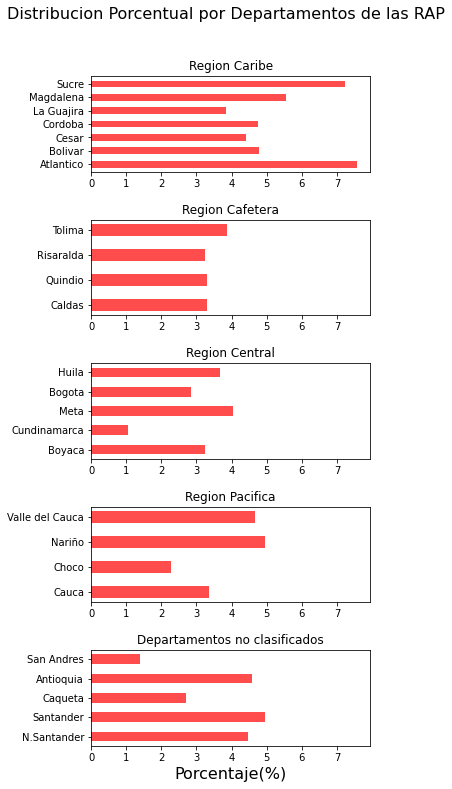

In [59]:

datos=datos_depto.value_counts()

regiones_str=["Region Caribe","Region Cafetera","Region Central","Region Pacifica","Departamentos no clasificados"]
region_caribe=["Atlantico","Bolivar","Cesar","Cordoba","La Guajira","Magdalena","Sucre"]
region_cafetera=["Caldas","Quindio","Risaralda","Tolima"]
region_central=["Boyaca","Cundinamarca","Meta","Bogota","Huila"]
region_pacifica=["Cauca","Choco","Nariño","Valle del Cauca"]
otros_deptos=["N.Santander","Santander","Caqueta","Antioquia","San Andres"]
regiones=[region_caribe,region_cafetera,region_central,region_pacifica,otros_deptos]

fig, ax = plt.subplots(5, sharex=True)
fig.set_size_inches(5,12)
plt.subplots_adjust(hspace = 0.5)
fig.subplots_adjust(top=0.9)
fig.suptitle("Distribucion Porcentual por Departamentos de las RAP", fontsize=16)

for i in range(5):
  ax[i].barh(datos[regiones[i]].index,list(map(lambda x:x*(1/86969),list(datos[regiones[i]].values*100)))\
             ,linewidth=0.1,height=0.5,color="red",alpha=0.7)
  ax[i].set_title(regiones_str[i])
  ax[i].xaxis.set_tick_params(which='both', labelbottom=True)
  
ax[4].set_xlabel("Porcentaje(%)",fontsize=16)

ax[0].xaxis.set_tick_params(which='both', labelbottom=True)
plt.show()


* Teniendo en cuenta lo observado en los Diagramas de barras de las distribuciones de aprticipacion de los diferetens departamentos dentro de la encuesta se plantea generar un Datafrma que asocie las variables de ```COD_DEPTO```, ```Region```, ```Ingreso Mes``` para poder realizar un diagrama de barras de las ventas promedio por Region, asi mismo poder realizar boxplots Comparativos entre las distribuciones de las ventas por region 

In [60]:
datos_depto_2=pd.DataFrame(datos_depto)
datos_depto_2["Region"]=datos_depto.replace({"Valle del Cauca":"Pacifica","Atlantico":"Caribe",\
                                             "Bogota":"Central","Bolivar":"Caribe","Boyaca":"Central"\
                                             ,"Caldas":"Cafetera","Caqueta":"No clasificado","Cauca":"Pacifica",
                                             "Cesar":"Caribe","Cordoba":"Caribe","Cundinamarca":"Central","Choco":"Pacifica",\
                                             "Huila":"Central","La Guajira":"Caribe","Magdalena":"Caribe","Meta":"Central",\
                                             "Nariño":"Pacifica","N.Santander":"No clasificado","Quindio":"Cafetera",\
                                             "Risaralda":"Cafetera","Santander":"No clasificado","Sucre":"Caribe","Tolima":"Central",\
                                             "Valle del Cauca":"Pacifica","San Andres":"No clasificado","Antioquia":"No clasificado"})
                                           
datos_depto_2["Ingreso_mes"]=datos_analisis["Ventas ultimo mes"]
datos_depto_2

,COD_DEPTO,Region,Ingreso_mes
ID,,,
478012011,Valle del Cauca,Pacifica,0
478012411,Valle del Cauca,Pacifica,0
478012511,Valle del Cauca,Pacifica,1300000
478013811,Valle del Cauca,Pacifica,400000
478014511,Cordoba,Caribe,60000
...,...,...,...
508024811,Huila,Central,70000
508024821,Huila,Central,300000
508025411,Caldas,Cafetera,7000000


* Al crear dicho Data Frame se presentan dos problemas.El primero de estos recae a la precencia de una gran cantidad de datos nulos, y por otro lado se presentan registros en 0, Por lo cual se modifica el dataframe eliminado las obersvaciones con valores de ventas nulas o cero.

In [61]:
datos_depto_2.dropna(axis=0,inplace=True) # drops nahs by axis 0
depto_limpia=datos_depto_2[(datos_depto_2 != 0).all(1)]
depto_limpia.head()

,COD_DEPTO,Region,Ingreso_mes
ID,,,
478012511,Valle del Cauca,Pacifica,1300000
478013811,Valle del Cauca,Pacifica,400000
478014511,Cordoba,Caribe,60000
478014811,Cordoba,Caribe,48000
478014831,Cordoba,Caribe,120000


* Teniendo en cuenta el hecho de que se editó el DataFrame, se plantea un diagrama de barras que de evidencia de los promedios de ventas del ultimo mes por region para posteriromente realizar un analizis conjunto con los boxplots. 

In [62]:
por_region=depto_limpia.groupby(["Region"])["Ingreso_mes"].mean()
por_region

Region
Cafetera          2.831681e+06
Caribe            2.421110e+06
Central           3.187460e+06
No clasificado    3.125035e+06
Pacifica          2.548056e+06
Name: Ingreso_mes, dtype: float64

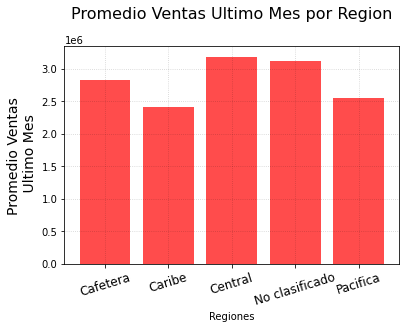

In [63]:
fig,ax=plt.subplots()
ax.bar(por_region.index,por_region.values,color="red",alpha=0.7)
ax.set_title("Promedio Ventas Ultimo Mes por Region",fontsize=16)
ax.set_xlabel("Regiones",fontsize=10)
plt.xticks(rotation=17,fontsize=12)
ax.set_ylabel("Promedio Ventas\n Ultimo Mes",fontsize=14)
ax.title.set_position([.5, 1.1])
ax.grid(which="major",linestyle=':',color="black",alpha=0.2)
ax.grid(which="minor",linestyle=":",color="black",alpha=0.2)


* Ahora se pueden generar los boxplots de las distribucion de las ventas del ultimo mes por Region con el uso del modulo ```seaborn```

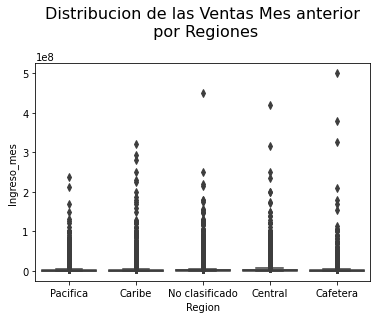

In [64]:
box=sns.boxplot( x=depto_limpia["Region"], y=depto_limpia["Ingreso_mes"] ,data=depto_limpia)
box.set_title("Distribucion de las Ventas Mes anterior\n por Regiones",fontsize=16)
box.title.set_position([.5, 1.1])

* Por ultimo se plantean dos diferentes diagramas. En primera medida, se realizará un diagrama de torta para presentar la variable "Genero". Después se realizará un histograma que presente la frecuencia por edad del propietario del micronegocio

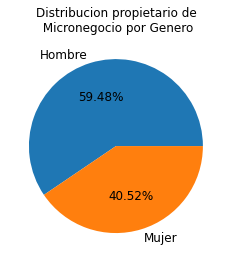

In [65]:
(datos_analisis['Sexo propietario'].replace({1:"Hombre",2:"Mujer"})).value_counts().plot(kind='pie',
                                                      autopct='%.2f%%',
                                                      title='Distribucion propietario de\n Micronegocio por Genero',
                                                      fontsize=12)
plt.ylabel('')
plt.xticks()
labels=datos_analisis['Sexo propietario']

Text(0.5, 1.0, 'Histograma edades')

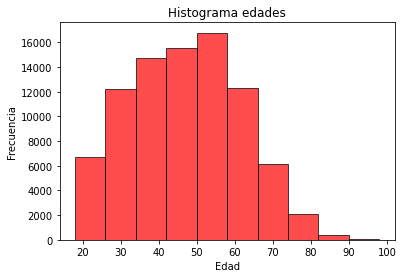

In [66]:
plt.hist(datos_analisis['Edad Propietario'],color='red',ec='black',alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma edades')

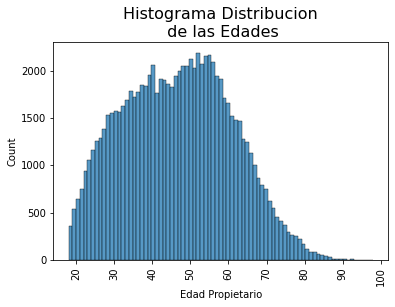

In [82]:
g = sns.histplot(x = "Edad Propietario",
            data = datos_analisis)
plt.title("Histograma Distribucion\n de las Edades",fontsize=16)
plt.xticks(rotation = 90)
plt.show()

 * se realizarán dos graficos de barras para ilustrar la frecuencia de las empresas separados por rama de actividad. El primero esta agrupada en 12 grupos, y el segundo en 4 grupos.

Text(0, 0.5, 'Frecuencia')

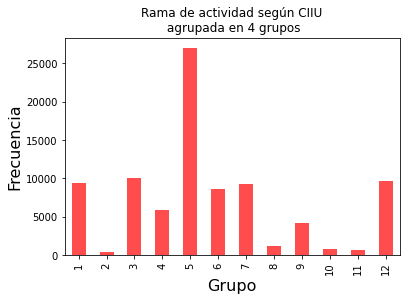

In [77]:
datos_analisis['Sector CIIU_12'].value_counts(sort=False).plot(kind='bar',
                                                              title='Rama de actividad según CIIU\n agrupada en 4 grupos',
                                                             color='red',
                                                             alpha=0.7)
plt.xlabel('Grupo',fontsize=16)
plt.ylabel('Frecuencia',fontsize=16)

Text(0, 0.5, 'Frecuencia')

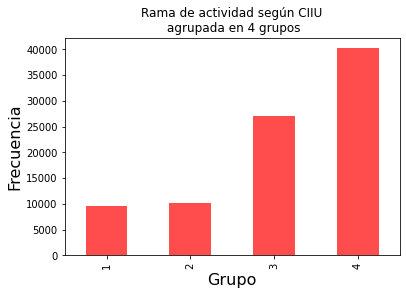

In [74]:
datos_analisis['Sector CIIU_4'].value_counts(sort=False).plot(kind='bar',
                                                              title='Rama de actividad según CIIU\n agrupada en 4 grupos',
                                                             color='red',
                                                             alpha=0.7)
plt.xlabel('Grupo',fontsize=16)
plt.ylabel('Frecuencia',fontsize=16)